In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as fit

In [7]:
CH4 = pd.read_csv('ch4_annmean_gl.csv', skiprows=43)

In [9]:
CH4.head()

,year,mean,unc
0,1984,1644.68,0.67
1,1985,1657.29,0.59
2,1986,1670.08,0.74
3,1987,1682.70,0.49
4,1988,1693.11,0.67


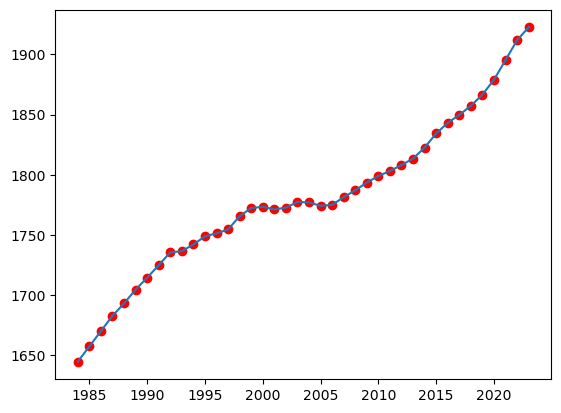

In [21]:
plt.figure()
plt.scatter(CH4["year"], CH4["mean"], color="red")
plt.errorbar(CH4["year"], CH4["mean"], yerr=CH4["unc"])
plt.show()

In [47]:
def f(x, a, b, c, d):
    return(a * x**3 + b * x**2 + c * x + d)

p0 = [1, 1, 1, 1775]

parameters, covariance = fit.curve_fit(f, CH4["year"], CH4["mean"], p0)

In [39]:
parameters

array([ 1.22762129e-02, -7.37653610e+01,  1.47749820e+05, -9.86461316e+07])

In [51]:
y_exp = CH4["mean"]
x = CH4["year"]
chi2 = sum((y_exp - f(x, parameters[0], parameters[1], parameters[2], parameters[3]))**2/CH4["unc"])

In [53]:
chi2

741.6000731653548

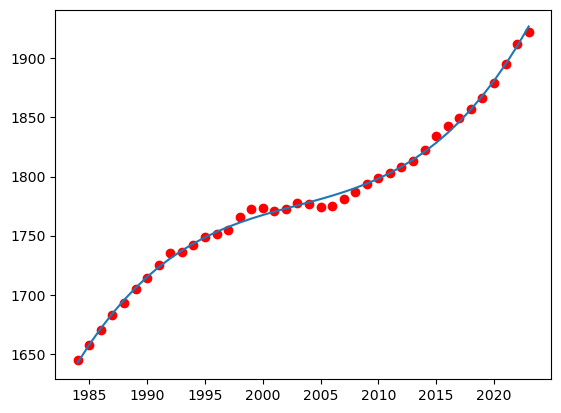

In [49]:
plt.figure()
plt.scatter(CH4["year"], CH4["mean"], color="red")
plt.plot(CH4["year"], f(x, parameters[0], parameters[1], parameters[2], parameters[3]))
plt.show()